In [ ]:
from google.colab import drive

import utils

drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLDL/Progetto/BiseNetv1
!pip install tensorboardX

Mounted at /content/drive
/content/drive/MyDrive/MLDL/Progetto/BiseNetv1


In [ ]:
!python train.py

epoch 0, lr 0.025000: 100% 500/500 [14:49<00:00,  1.78s/it, loss=1.350528]
loss for train : 2.587890
epoch 1, lr 0.024550: 100% 500/500 [11:16<00:00,  1.35s/it, loss=1.408606]
loss for train : 1.438000
epoch 2, lr 0.024098: 100% 500/500 [11:11<00:00,  1.34s/it, loss=1.158063]
loss for train : 1.187436
epoch 3, lr 0.023646:  63% 316/500 [07:03<04:05,  1.34s/it, loss=0.983792]

In [1]:
import torch

print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 2060


KeyboardInterrupt: 

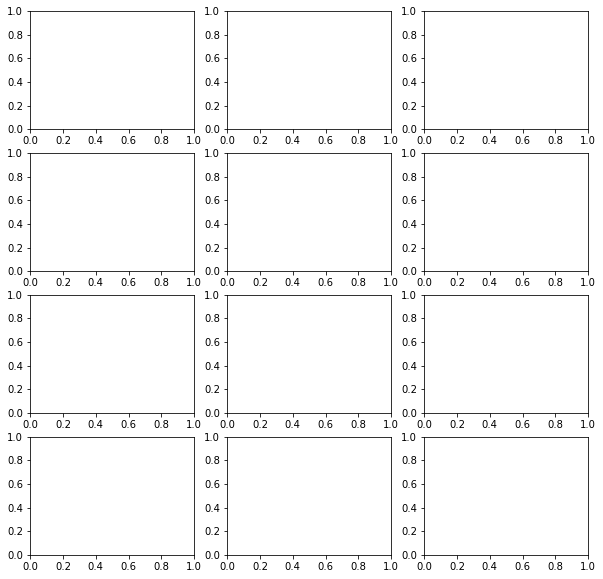

In [3]:
from dataset.Cityscapes import Cityscapes
from torch.utils.data import DataLoader
import torch
from model.build_BiSeNet import BiSeNet
from utils import denormalize_image, format_image_print, format_label_print
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

batch_size = 4
dataset_train = Cityscapes('../Cityscapes', 'val', [512, 1024])
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
img_batch, lbl_batch = next(iter(dataloader_train))

model = BiSeNet(19, "resnet101")
model.load_state_dict(torch.load('checkpoints_101_sgd/best_dice_loss_not_normalized.pth'))
model.eval()

a = (np.array(dataset_train.palette).reshape(20,3)) / 255
b = np.ones((20,1))
c = np.hstack((a,b)).tolist()
colors = [tuple(row) for row in c]
patches = [ mpatches.Patch(color=colors[i], label=dataset_train.labels[i]) for i in range(20)]

with torch.no_grad():
    fig, axarr = plt.subplots(batch_size, 3, figsize=(10,10))
    img_batch_denorm = denormalize_image(img_batch, dataset_train.mean, dataset_train.std)
    #img_batch_denorm = img_batch
    # modello è trainato su dati non normalizzati, quando traino con dati
    # normalizzati, devo fare previsione su dati non denormalizzati
    pred_batch = model(img_batch_denorm)
    pred_lbl_batch = torch.argmax(pred_batch, dim=1)
    for idx in range(batch_size):
        img = img_batch_denorm[idx]
        lbl = lbl_batch[idx]
        pred = pred_lbl_batch[idx]

        # quando stampo, devo prima denormalizzare
        axarr[idx,0].imshow(format_image_print(img))
        axarr[idx,1].imshow(format_label_print(lbl, dataset_train.palette))
        axarr[idx,2].imshow(format_label_print(pred, dataset_train.palette))

        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )


In [4]:
import argparse
from dataset.Cityscapes import Cityscapes
from torch.utils.data import DataLoader
import torch
from model.build_BiSeNet import BiSeNet
from train import val
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 1
dataset_val = Cityscapes('../Cityscapes', 'val', [512, 1024])
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)

model = BiSeNet(19, "resnet101")
model.load_state_dict(torch.load('checkpoints_101_sgd/best_dice_loss_no_norm2022_04_05_23_16_58.pth'))
model.to(device)
model.eval()


params = ['--num_classes', '19']
parser = argparse.ArgumentParser()
parser.add_argument('--num_classes', type=int, default=32, help='num of object classes (with void)')
parser.add_argument('--loss', type=str, default='crossentropy', help='loss function, dice or crossentropy')
args = parser.parse_args(params)



val(args, model, dataloader_val)

'''
RESULTS

----Normalized----
precision per pixel for test: 0.792
mIoU for validation: 0.505
mIoU per class: [0.96294188 0.72600995 0.8652103  0.21081161 0.21821133 0.38289634
 0.24757844 0.4273833  0.87462657 0.4531943  0.85971914 0.58289537
 0.29022382 0.88195253 0.26300874 0.33222182 0.18052598 0.23968545
 0.58716085]

 ----Not-Normalized----
precision per pixel for test: 0.793
mIoU for validation: 0.509
mIoU per class: [0.95965577 0.72060925 0.86625381 0.22490563 0.28030059 0.37228628
 0.20837707 0.44171816 0.87756267 0.47901679 0.87616719 0.56823063
 0.24720231 0.88443451 0.39192    0.35956149 0.09976892 0.22666533
 0.59296436]

'''

start val!
precision per pixel for test: 0.793
mIoU for validation: 0.509
mIoU per class: [0.95965577 0.72060925 0.86625381 0.22490563 0.28030059 0.37228628
 0.20837707 0.44171816 0.87756267 0.47901679 0.87616719 0.56823063
 0.24720231 0.88443451 0.39192    0.35956149 0.09976892 0.22666533
 0.59296436]


'\nRESULTS\n\n----Normalized----\nprecision per pixel for test: 0.792\nmIoU for validation: 0.505\nmIoU per class: [0.96294188 0.72600995 0.8652103  0.21081161 0.21821133 0.38289634\n 0.24757844 0.4273833  0.87462657 0.4531943  0.85971914 0.58289537\n 0.29022382 0.88195253 0.26300874 0.33222182 0.18052598 0.23968545\n 0.58716085]\n\n ----Not-Normalized----\nprecision per pixel for test: 0.793\nmIoU for validation: 0.509\nmIoU per class: [0.95965577 0.72060925 0.86625381 0.22490563 0.28030059 0.37228628\n 0.20837707 0.44171816 0.87756267 0.47901679 0.87616719 0.56823063\n 0.24720231 0.88443451 0.39192    0.35956149 0.09976892 0.22666533\n 0.59296436]\n\n'